In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC, SVR

In [2]:
# Load dataset
df = pd.read_csv('brain_tumor_dataset.csv')

In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  int64  
 2   Tumor_Type           20000 non-null  int64  
 3   Tumor_Size           20000 non-null  float64
 4   Location             20000 non-null  int64  
 5   Histology            20000 non-null  int64  
 6   Stage                20000 non-null  int64  
 7   Symptom_1            20000 non-null  int64  
 8   Symptom_2            20000 non-null  int64  
 9   Symptom_3            20000 non-null  int64  
 10  Radiation_Treatment  20000 non-null  int64  
 11  Surgery_Performed    20000 non-null  int64  
 12  Chemotherapy         20000 non-null  int64  
 13  Survival_Rate        20000 non-null  float64
 14  Tumor_Growth_Rate    20000 non-null  float64
 15  Family_History       20000 non-null 

In [9]:
df


Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  \
0       73       1           1    5.375612         3          0      2   
1       26       1           0    4.847098         2          1      1   
2       31       1           0    5.588391         2          3      0   
3       29       1           1    1.436600         3          2      3   
4       54       0           0    2.417506         2          1      0   
...    ...     ...         ...         ...       ...        ...    ...   
19995   21       1           1    9.612013         2          2      2   
19996   32       0           0    1.543560         3          3      2   
19997   57       0           0    3.618634         3          2      0   
19998   68       1           1    8.519086         2          1      2   
19999   61       1           0    9.716768         3          2      0   

       Symptom_1  Symptom_2  Symptom_3  Radiation_Treatment  \
0              3          2          2                    0   
1              0          0          1                    1   
2              3          0          2                    0   
3              3          2          0                    1   
4              0          0          2                    0   
...          ...        ...        ...                  ...   
19995          2          1          3                    0   
19996          0          0          3                    1   
19997          2          3          1                    0   
19998          2          0          3                    1   
19999          3          2          1                    0   

       Surgery_Performed  Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                      0             0      51.312579           0.111876   
1                      1             1      46.373273           2.165736   
2                      0             0      47.072221           1.884228   
3                      0             1      51.853634           1.283342   
4                      0             1      54.708987           2.069477   
...                  ...           ...            ...                ...   
19995                  0             1      58.229662           0.353806   
19996                  1             0      77.706856           2.341074   
19997                  0             1      89.543803           2.332881   
19998                  1             1      83.306781           2.387202   
19999                  0             0      47.433468           2.464077   

       Family_History  MRI_Result  Follow_Up_Required  
0                   0           1                   1  
1                   1           1                   1  
2                   0           0                   0  
3                   1           0                   0  
4                   0           1                   1  
...               ...         ...                 ...  
19995               0           0                   1  
19996               0           1                   0  
19997               0           1                   1  
19998               0           1                   0  
19999               1           0                   1  

[20000 rows x 18 columns]

In [10]:

df.isnull()


Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  \
0      False   False       False       False     False      False  False   
1      False   False       False       False     False      False  False   
2      False   False       False       False     False      False  False   
3      False   False       False       False     False      False  False   
4      False   False       False       False     False      False  False   
...      ...     ...         ...         ...       ...        ...    ...   
19995  False   False       False       False     False      False  False   
19996  False   False       False       False     False      False  False   
19997  False   False       False       False     False      False  False   
19998  False   False       False       False     False      False  False   
19999  False   False       False       False     False      False  False   

       Symptom_1  Symptom_2  Symptom_3  Radiation_Treatment  \
0          False      False      False                False   
1          False      False      False                False   
2          False      False      False                False   
3          False      False      False                False   
4          False      False      False                False   
...          ...        ...        ...                  ...   
19995      False      False      False                False   
19996      False      False      False                False   
19997      False      False      False                False   
19998      False      False      False                False   
19999      False      False      False                False   

       Surgery_Performed  Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                  False         False          False              False   
1                  False         False          False              False   
2                  False         False          False              False   
3                  False         False          False              False   
4                  False         False          False              False   
...                  ...           ...            ...                ...   
19995              False         False          False              False   
19996              False         False          False              False   
19997              False         False          False              False   
19998              False         False          False              False   
19999              False         False          False              False   

       Family_History  MRI_Result  Follow_Up_Required  
0               False       False               False  
1               False       False               False  
2               False       False               False  
3               False       False               False  
4               False       False               False  
...               ...         ...                 ...  
19995           False       False               False  
19996           False       False               False  
19997           False       False               False  
19998           False       False               False  
19999           False       False               False  

[20000 rows x 18 columns]

In [11]:
df

Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  \
0       73       1           1    5.375612         3          0      2   
1       26       1           0    4.847098         2          1      1   
2       31       1           0    5.588391         2          3      0   
3       29       1           1    1.436600         3          2      3   
4       54       0           0    2.417506         2          1      0   
...    ...     ...         ...         ...       ...        ...    ...   
19995   21       1           1    9.612013         2          2      2   
19996   32       0           0    1.543560         3          3      2   
19997   57       0           0    3.618634         3          2      0   
19998   68       1           1    8.519086         2          1      2   
19999   61       1           0    9.716768         3          2      0   

       Symptom_1  Symptom_2  Symptom_3  Radiation_Treatment  \
0              3          2          2                    0   
1              0          0          1                    1   
2              3          0          2                    0   
3              3          2          0                    1   
4              0          0          2                    0   
...          ...        ...        ...                  ...   
19995          2          1          3                    0   
19996          0          0          3                    1   
19997          2          3          1                    0   
19998          2          0          3                    1   
19999          3          2          1                    0   

       Surgery_Performed  Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                      0             0      51.312579           0.111876   
1                      1             1      46.373273           2.165736   
2                      0             0      47.072221           1.884228   
3                      0             1      51.853634           1.283342   
4                      0             1      54.708987           2.069477   
...                  ...           ...            ...                ...   
19995                  0             1      58.229662           0.353806   
19996                  1             0      77.706856           2.341074   
19997                  0             1      89.543803           2.332881   
19998                  1             1      83.306781           2.387202   
19999                  0             0      47.433468           2.464077   

       Family_History  MRI_Result  Follow_Up_Required  
0                   0           1                   1  
1                   1           1                   1  
2                   0           0                   0  
3                   1           0                   0  
4                   0           1                   1  
...               ...         ...                 ...  
19995               0           0                   1  
19996               0           1                   0  
19997               0           1                   1  
19998               0           1                   0  
19999               1           0                   1  

[20000 rows x 18 columns]

In [12]:
# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
# Splitting features and target
X = df.drop(columns=["Tumor_Type", "Survival_Rate","Tumor_Growth_Rate"])

In [37]:
df

Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  \
0       73       1           1    5.375612         3          0      2   
1       26       1           0    4.847098         2          1      1   
2       31       1           0    5.588391         2          3      0   
3       29       1           1    1.436600         3          2      3   
4       54       0           0    2.417506         2          1      0   
...    ...     ...         ...         ...       ...        ...    ...   
19995   21       1           1    9.612013         2          2      2   
19996   32       0           0    1.543560         3          3      2   
19997   57       0           0    3.618634         3          2      0   
19998   68       1           1    8.519086         2          1      2   
19999   61       1           0    9.716768         3          2      0   

       Symptom_1  Symptom_2  Symptom_3  Radiation_Treatment  \
0              3          2          2                    0   
1              0          0          1                    1   
2              3          0          2                    0   
3              3          2          0                    1   
4              0          0          2                    0   
...          ...        ...        ...                  ...   
19995          2          1          3                    0   
19996          0          0          3                    1   
19997          2          3          1                    0   
19998          2          0          3                    1   
19999          3          2          1                    0   

       Surgery_Performed  Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                      0             0      51.312579           0.111876   
1                      1             1      46.373273           2.165736   
2                      0             0      47.072221           1.884228   
3                      0             1      51.853634           1.283342   
4                      0             1      54.708987           2.069477   
...                  ...           ...            ...                ...   
19995                  0             1      58.229662           0.353806   
19996                  1             0      77.706856           2.341074   
19997                  0             1      89.543803           2.332881   
19998                  1             1      83.306781           2.387202   
19999                  0             0      47.433468           2.464077   

       Family_History  MRI_Result  Follow_Up_Required  
0                   0           1                   1  
1                   1           1                   1  
2                   0           0                   0  
3                   1           0                   0  
4                   0           1                   1  
...               ...         ...                 ...  
19995               0           0                   1  
19996               0           1                   0  
19997               0           1                   1  
19998               0           1                   0  
19999               1           0                   1  

[20000 rows x 18 columns]

In [14]:
# Classification task
y_classification = df["Tumor_Type"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Regression task
y_regression = df["Survival_Rate"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print("Data Preprocessing completed")


Data Preprocessing completed


In [38]:
# Standardizing numerical features
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

In [24]:

# # Selecting two features for visualization
# feature_1, feature_2 = "Tumor_Size", "Tumor_Growth_Rate"
# X = df[[feature_1, feature_2]]

In [26]:
# Standardizing only selected features for visualization
scaler_vis = StandardScaler()
X_train_c = scaler_vis.fit_transform(X_train_c)
X_test_c = scaler_vis.transform(X_test_c)


In [27]:
# KNN Classification Model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_c, y_train_c)

print("KNN Classification Model trained")


KNN Classification Model trained


In [28]:
y_pred_c = knn_classifier.predict(X_test_c)


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47      1997
           1       0.48      0.49      0.49      2003

    accuracy                           0.48      4000
   macro avg       0.48      0.48      0.48      4000
weighted avg       0.48      0.48      0.48      4000



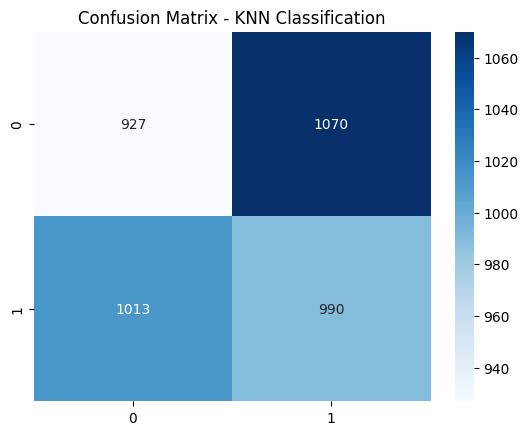

In [29]:
# Evaluate Classification
print("KNN Classification Report:\n", classification_report(y_test_c, y_pred_c))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Classification")
plt.show()


In [30]:

# KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_r, y_train_r)

print('KNN Regression Model Trained')


KNN Regression Model Trained


In [31]:
y_pred_r = knn_regressor.predict(X_test_r)

In [32]:

# Evaluate Regression
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("R2 Score:", r2_score(y_test_r, y_pred_r))

MSE: 360.75434263784706
RMSE: 18.99353423241307
R2 Score: -0.2229016536939734


In [34]:
# # Plot Decision Boundary for KNN
# x_min, x_max = df[feature_1].min() - 1, df[feature_1].max() + 1
# y_min, y_max = df[feature_2].min() - 1, df[feature_2].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# # Scale mesh grid points before prediction using visualization scaler
# xy_scaled = scaler_vis.transform(np.c_[xx.ravel(), yy.ravel()])
# z = knn_classifier.predict(xy_scaled).reshape(xx.shape)

# plt.contourf(xx, yy, z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))
# plt.scatter(X_train_c[:, 0], X_train_c[:, 1], c=y_train_c, edgecolors='k', cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']))
# plt.title("KNN Decision Boundary")
# plt.xlabel(feature_1)
# plt.ylabel(feature_2)
# #plt.show()

In [39]:
# Visualization
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.xlabel("Actual Survival Rate")
plt.ylabel("Predicted Survival Rate")
plt.title("KNN Regression Predictions")
plt.show()

In [35]:


# Plot error distribution
sns.histplot(y_test_r - y_pred_r, kde=True)
plt.title("Error Distribution - KNN Regression")
plt.show()